# Описание проекта

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет. <br>

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года: <br>
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Вам предстоит изучить:<br>
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

# Содержание
1.[Шаг 1. Загрузите данные и подготовьте их к анализу](#1)<br>
2.[Шаг 2. Рассчитайте метрики и постройте графики](#2)<br>
3.[Шаг 3. Сформулируйте выводы и рекомендации](#3)


<a id='1'></a><br>
## Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')


In [2]:
orders=pd.read_csv('/datasets/orders_log.csv')
orders.columns=orders.columns.str.lower().str.replace(' ','_')
display(orders.info())
display(orders.describe())
display(orders.sample())
display(orders.head())
orders['buy_ts']=pd.to_datetime(orders['buy_ts'])
orders['revenue']=orders['revenue'].astype('float32')
print('Количество дубликатов ', orders.duplicated().sum())
print('Количество пропусков ',
      orders.isna().sum())

display(orders.info())
display(orders.head())

print(orders['revenue'].sort_values(ascending=False))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,buy_ts,revenue,uid
19611,2017-11-24 18:41:00,1.83,1272576639407782175


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Количество дубликатов  0
Количество пропусков  buy_ts     0
revenue    0
uid        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float32
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float32(1), uint64(1)
memory usage: 984.8 KB


None

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


23244    2633.280029
36522    1236.280029
36682    1221.369995
23165    1195.640015
24607    1109.099976
            ...     
45084       0.000000
44844       0.000000
20783       0.000000
1802        0.000000
20720       0.000000
Name: revenue, Length: 50415, dtype: float32


In [3]:
visits= pd.read_csv('/datasets/visits_log.csv')
visits.columns=visits.columns.str.lower().str.replace(' ','_')
display(visits.info())
display(visits.describe())
display(visits.sample())
display(visits.head())

print('Количество дубликатов ', visits.duplicated().sum())

print('Количество пропусков ',
  visits.isna().sum())


visits['end_ts']=pd.to_datetime(visits['end_ts'])
visits['start_ts']=pd.to_datetime(visits['start_ts'])
visits['source_id']=visits['source_id'].astype('int16')
display(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,device,end_ts,source_id,start_ts,uid
346599,desktop,2018-02-16 16:21:00,2,2018-02-16 16:19:00,15250286877235012854


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Количество дубликатов  0
Количество пропусков  device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int16
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int16(1), object(1), uint64(1)
memory usage: 11.7+ MB


None

In [4]:
costs=pd.read_csv('/datasets/costs.csv')

display(costs.info())
display(costs.describe())
display(costs.sample())
display(costs.head())

costs['dt']=pd.to_datetime(costs['dt'])
costs['source_id']=costs['source_id'].astype('int32')
costs['costs']=costs['costs'].astype('float64')

print('Количество дубликатов ', costs.duplicated().sum())

print('Количество пропусков ',
  costs.isna().sum())
print(costs['costs'].sort_values(ascending=False))

display(costs.info())
c=costs.groupby('source_id')['costs'].sum()
display(c)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


,source_id,dt,costs
2100,9,2018-03-12,13.74


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Количество дубликатов  0
Количество пропусков  source_id    0
dt           0
costs        0
dtype: int64
902     1788.28
919     1061.18
1005     996.15
853      980.52
936      858.28
         ...   
1431       1.31
2253       1.22
1379       0.83
1755       0.70
2235       0.54
Name: costs, Length: 2542, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int32
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 49.8 KB


None

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

- Рассмотрели таблицы , проверили данные на дубликаты , скорректировали наименование столбцов

<a id='2'></a><br>
## Шаг 2. Рассчитайте метрики и постройте графики

###  Продуктовые метрики
- 2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период.
- Отобразите изменения метрик во времени на графиках;

Среднее значениие DAU = 907.9917582417582


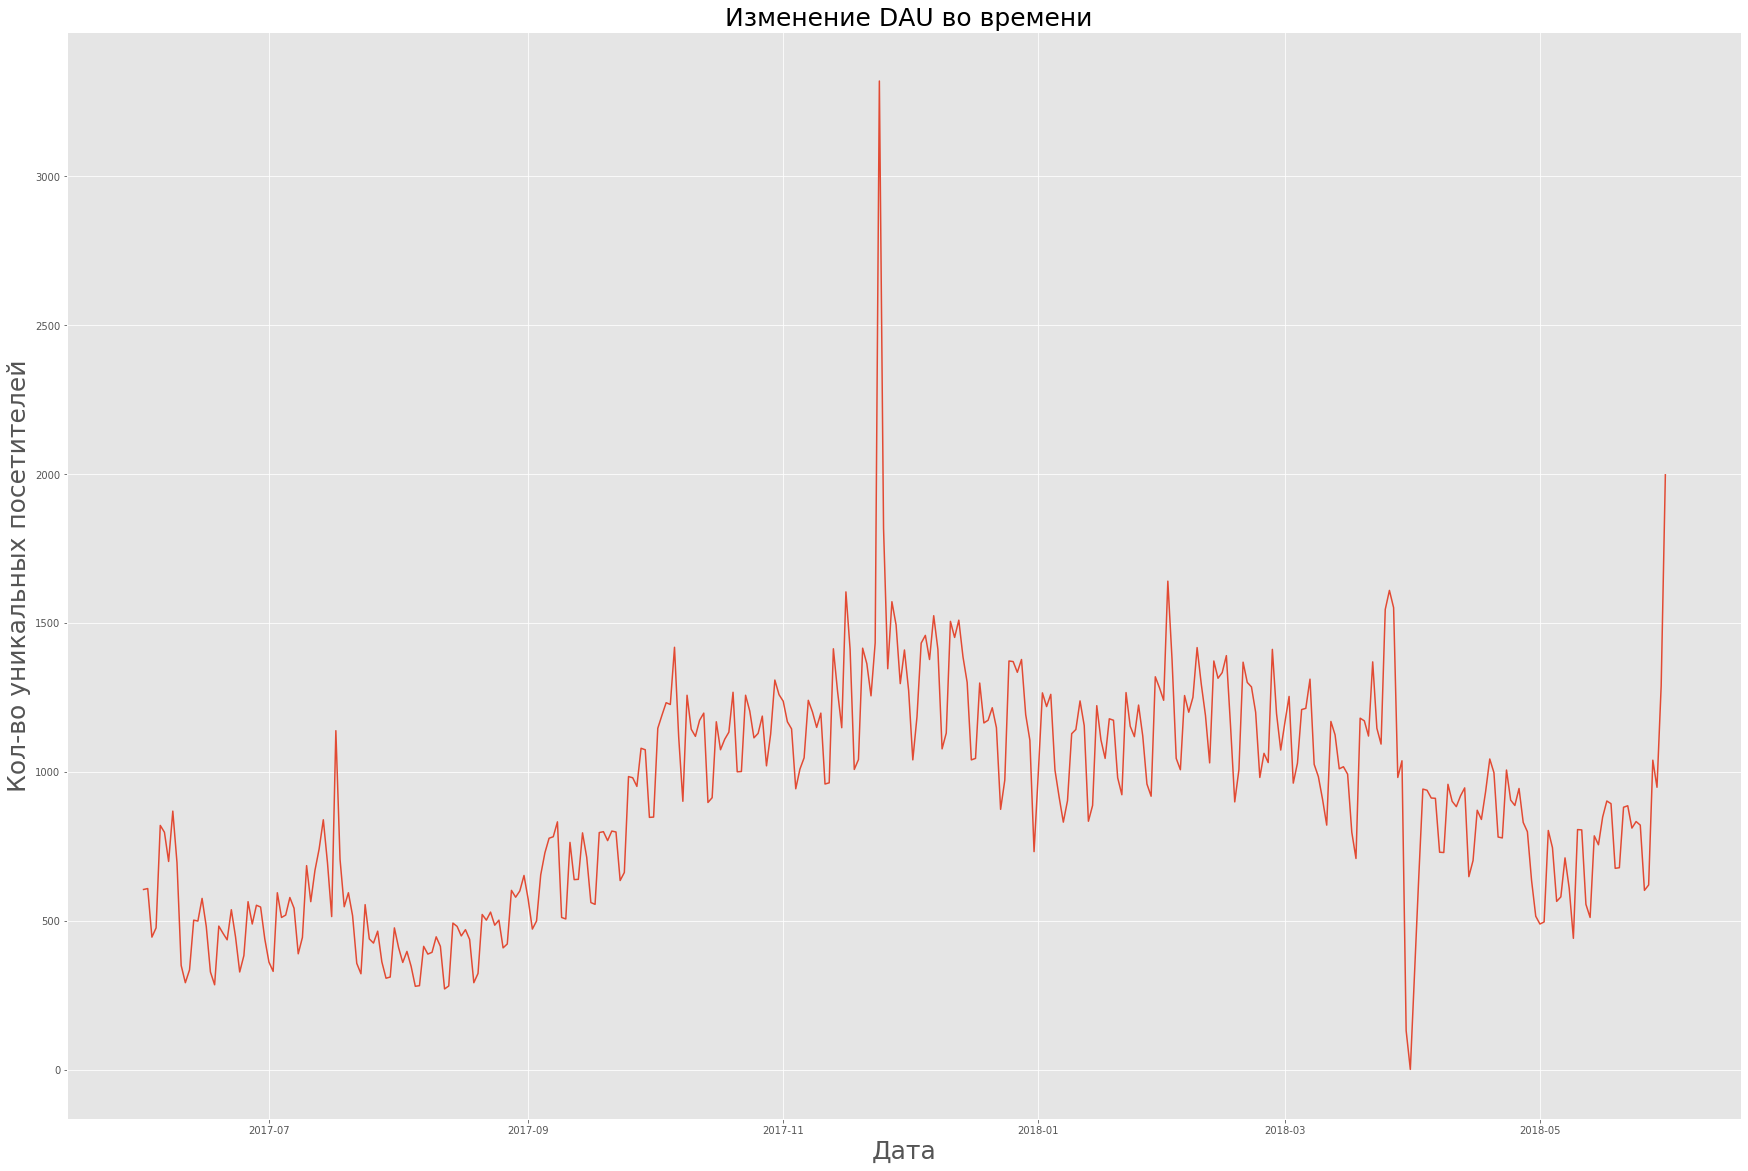

In [5]:


visits['start_ts']= pd.to_datetime(visits['start_ts'])

visits['year_session']=visits['start_ts'].dt.year
visits['month_session']=visits['start_ts'].astype('datetime64[M]')
visits['week_session']=visits['start_ts'].astype('datetime64[W]')
visits['day_session']=visits['start_ts'].dt.date

dau_mean= visits.groupby('day_session').agg({'uid':'nunique'}).reset_index()
dau_mean.columns=['day_session' ,'unique']
print( "Среднее значениие DAU =" ,dau_mean['unique'].mean())

plt.figure(figsize=(30,20))
plt.style.use('ggplot')
plt.plot(dau_mean['day_session'],dau_mean['unique'])
plt.title(' Изменение DAU во времени' , fontsize=25)
plt.xlabel('Дата',fontsize=25)
plt.ylabel('Кол-во уникальных посетителей',fontsize=25)
plt.show();


In [6]:
display(dau_mean.sort_values(by='unique' , ascending=False))

,day_session,unique
176,2017-11-24,3319
363,2018-05-31,1997
177,2017-11-25,1817
245,2018-02-01,1640
298,2018-03-26,1609
...,...,...
73,2017-08-13,281
65,2017-08-05,280
72,2017-08-12,271
302,2018-03-30,131


In [7]:
costs2017_11_24=costs.query('dt=="2017-11-24"')

In [8]:
source_1=costs.query('source_id=="1"')
display(source_1.sort_values(by='costs', ascending=False))

,source_id,dt,costs
176,1,2017-11-24,245.75
362,1,2018-05-31,141.70
361,1,2018-05-30,130.47
259,1,2018-02-15,129.46
141,1,2017-10-20,125.68
...,...,...,...
58,1,2017-07-29,12.60
23,1,2017-06-24,10.72
56,1,2017-07-27,9.92
302,1,2018-03-30,6.98


In [9]:
visits['day_session']=pd.to_datetime(visits['day_session'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
device           359400 non-null object
end_ts           359400 non-null datetime64[ns]
source_id        359400 non-null int16
start_ts         359400 non-null datetime64[ns]
uid              359400 non-null uint64
year_session     359400 non-null int64
month_session    359400 non-null datetime64[ns]
week_session     359400 non-null datetime64[ns]
day_session      359400 non-null datetime64[ns]
dtypes: datetime64[ns](5), int16(1), int64(1), object(1), uint64(1)
memory usage: 22.6+ MB


In [10]:

total_visitors=visits.groupby(['source_id','day_session'])['uid'].count().reset_index()
total_visitors2017_11_24=total_visitors.query('day_session=="2017-11-24"')
costs2017_11_24=costs2017_11_24.merge(total_visitors2017_11_24 , on='source_id')

costs2017_11_24['costs_per_user']=costs2017_11_24['costs']/costs2017_11_24['uid']
costs2017_11_24

,source_id,dt,costs,day_session,uid,costs_per_user
0,1,2017-11-24,245.75,2017-11-24,615,0.399593
1,2,2017-11-24,507.09,2017-11-24,612,0.828578
2,3,2017-11-24,1788.28,2017-11-24,965,1.853140
3,4,2017-11-24,80.88,2017-11-24,783,0.103295
4,5,2017-11-24,719.22,2017-11-24,417,1.724748
5,9,2017-11-24,49.53,2017-11-24,567,0.087354
6,10,2017-11-24,68.11,2017-11-24,83,0.820602


### Интерсно , какие маркетинговые акции были задействованы 2017-11-24 , в этот день количество уникальных посетителей достикло 3319 человек , также видим провалы  с привлечением новых посететителей в конце марта 

Среднее значениие WAU за 2017 = 5349.903225806452


Text(0, 0.5, 'Кол-во уникальных посетителей')

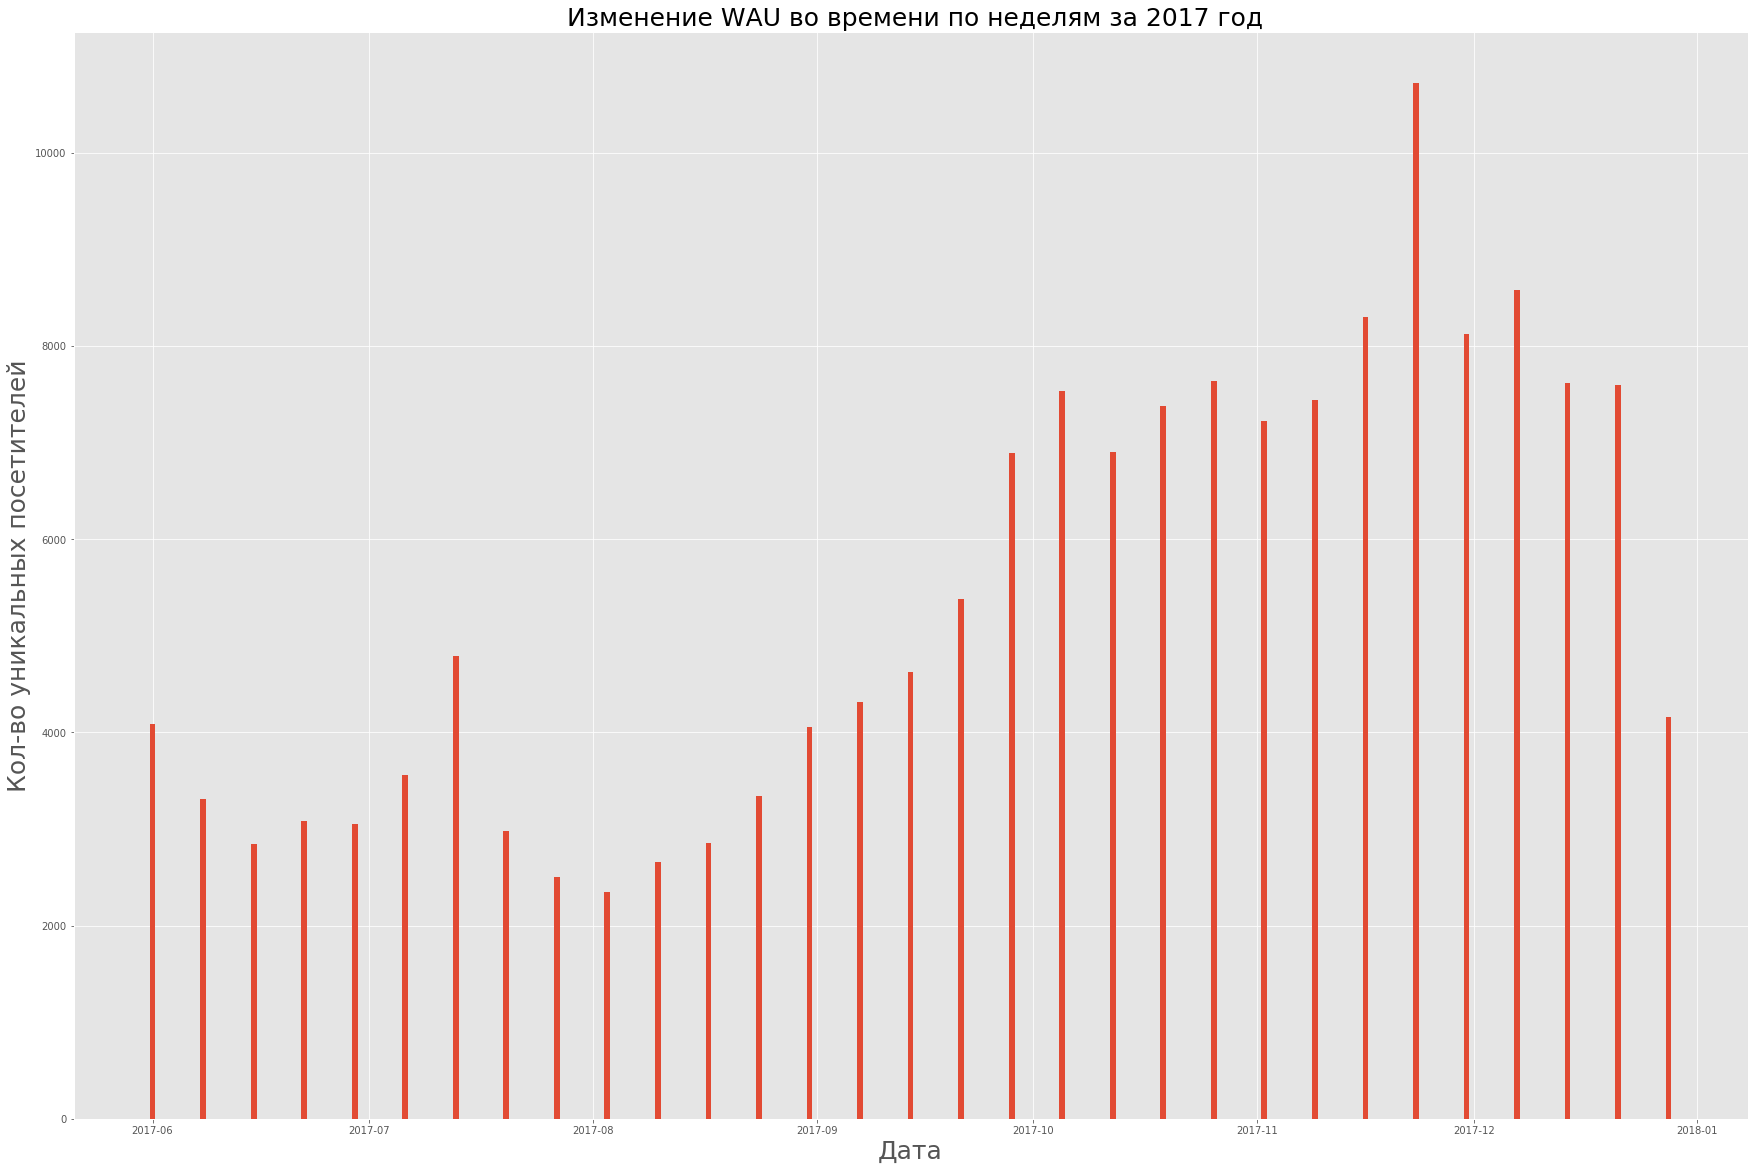

In [11]:
visits_2017=visits.query('year_session=="2017"')
wau_total_2017= visits_2017.groupby('week_session').agg({'uid':'nunique'}).reset_index()
wau_total_2017.columns=['week_session' ,'unique']
print( "Среднее значениие WAU за 2017 =" ,wau_total_2017['unique'].mean())





plt.figure(figsize=(30,20))
plt.style.use('ggplot')
plt.bar(wau_total_2017['week_session'],wau_total_2017['unique'])
plt.title(' Изменение WAU во времени по неделям за 2017 год' , fontsize=25)
plt.xlabel('Дата',fontsize=25)
plt.ylabel('Кол-во уникальных посетителей',fontsize=25)

Среднее значениие WAU за 2018 = 5988.04347826087


Text(0, 0.5, 'Кол-во уникальных посетителей')

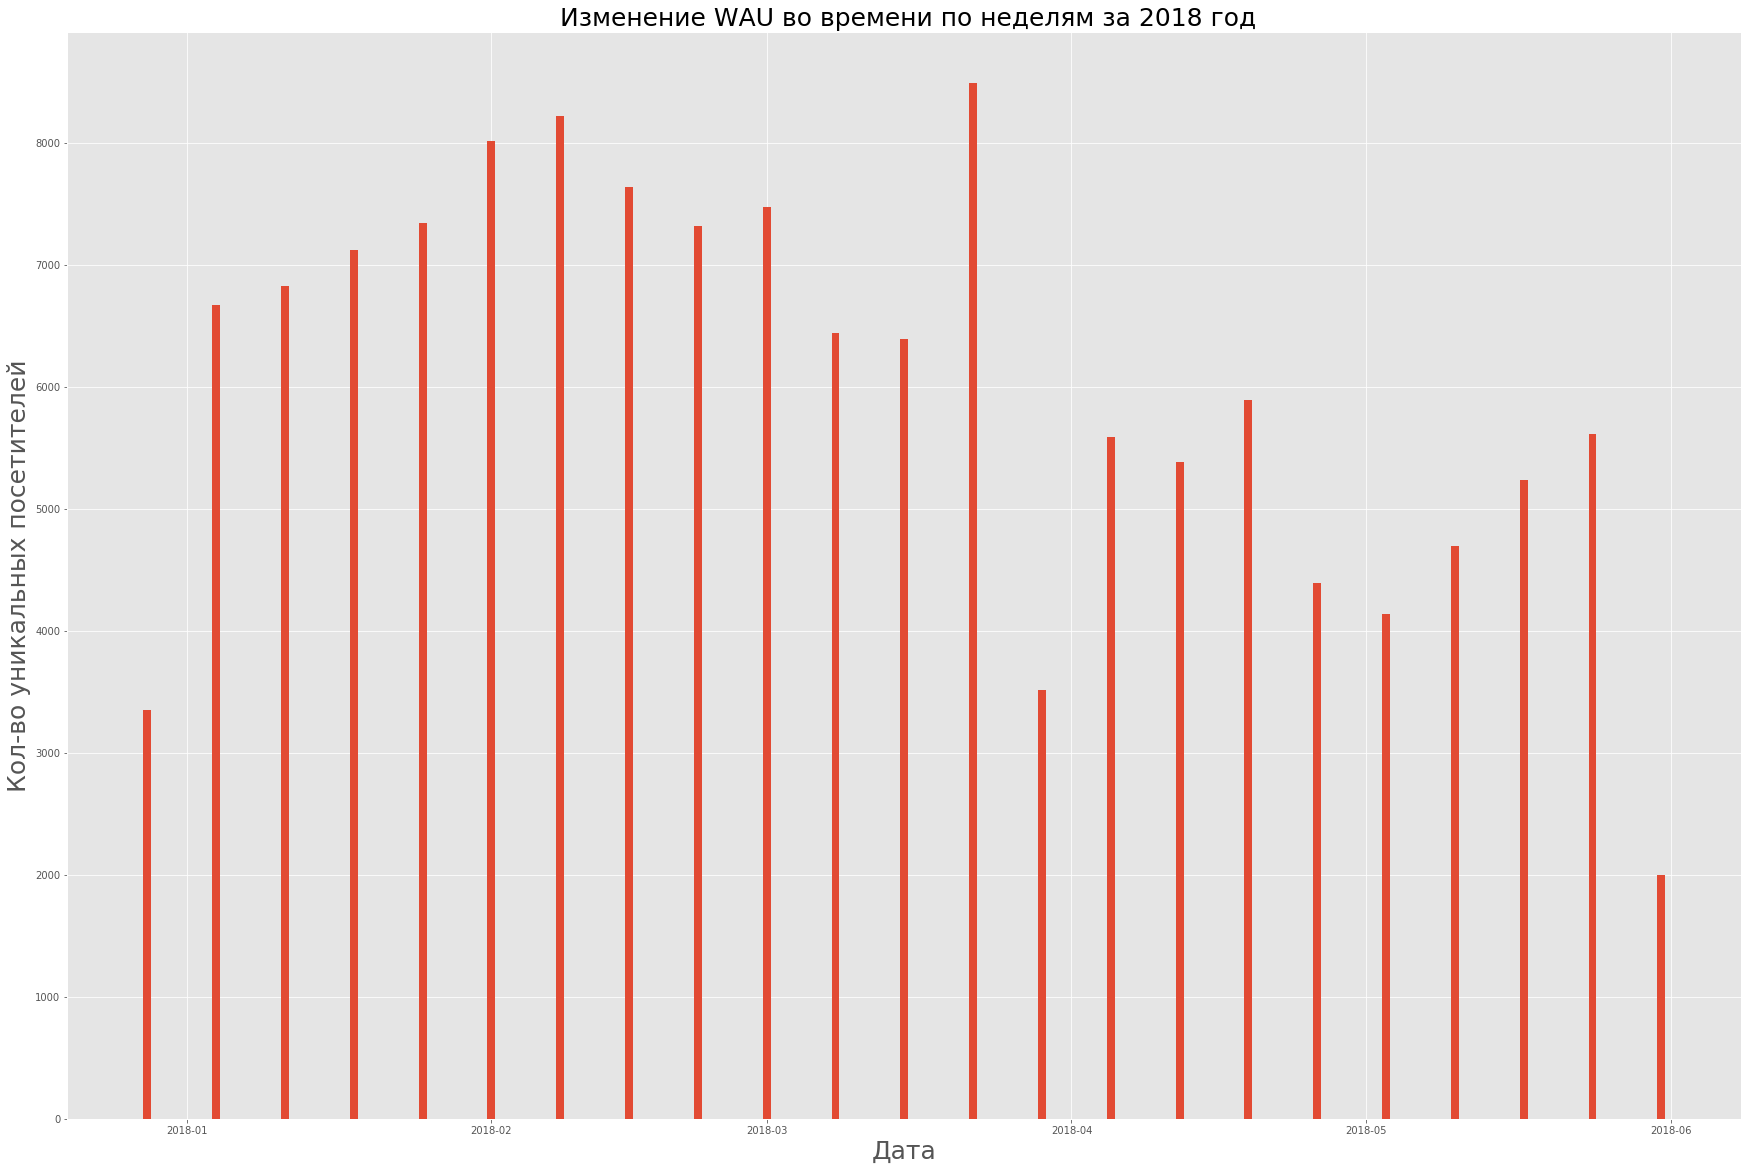

In [12]:
visits_2018=visits.query('year_session=="2018"')
wau_total_2018= visits_2018.groupby('week_session').agg({'uid':'nunique'}).reset_index()
wau_total_2018.columns=['week_session' ,'unique']
print( "Среднее значениие WAU за 2018 =" ,wau_total_2018['unique'].mean())





plt.figure(figsize=(30,20))
plt.style.use('ggplot')
plt.bar(wau_total_2018['week_session'],wau_total_2018['unique'])
plt.title(' Изменение WAU во времени по неделям за 2018 год' , fontsize=25)
plt.xlabel('Дата',fontsize=25)
plt.ylabel('Кол-во уникальных посетителей',fontsize=25)

#### Отличный рост по количеству новых посетителей  в 2017 году и явная тенденция на спад в 2018 году , похоже  чтото пошло не так 

Среднее значениие MAU за 2017 = 21727.714285714286


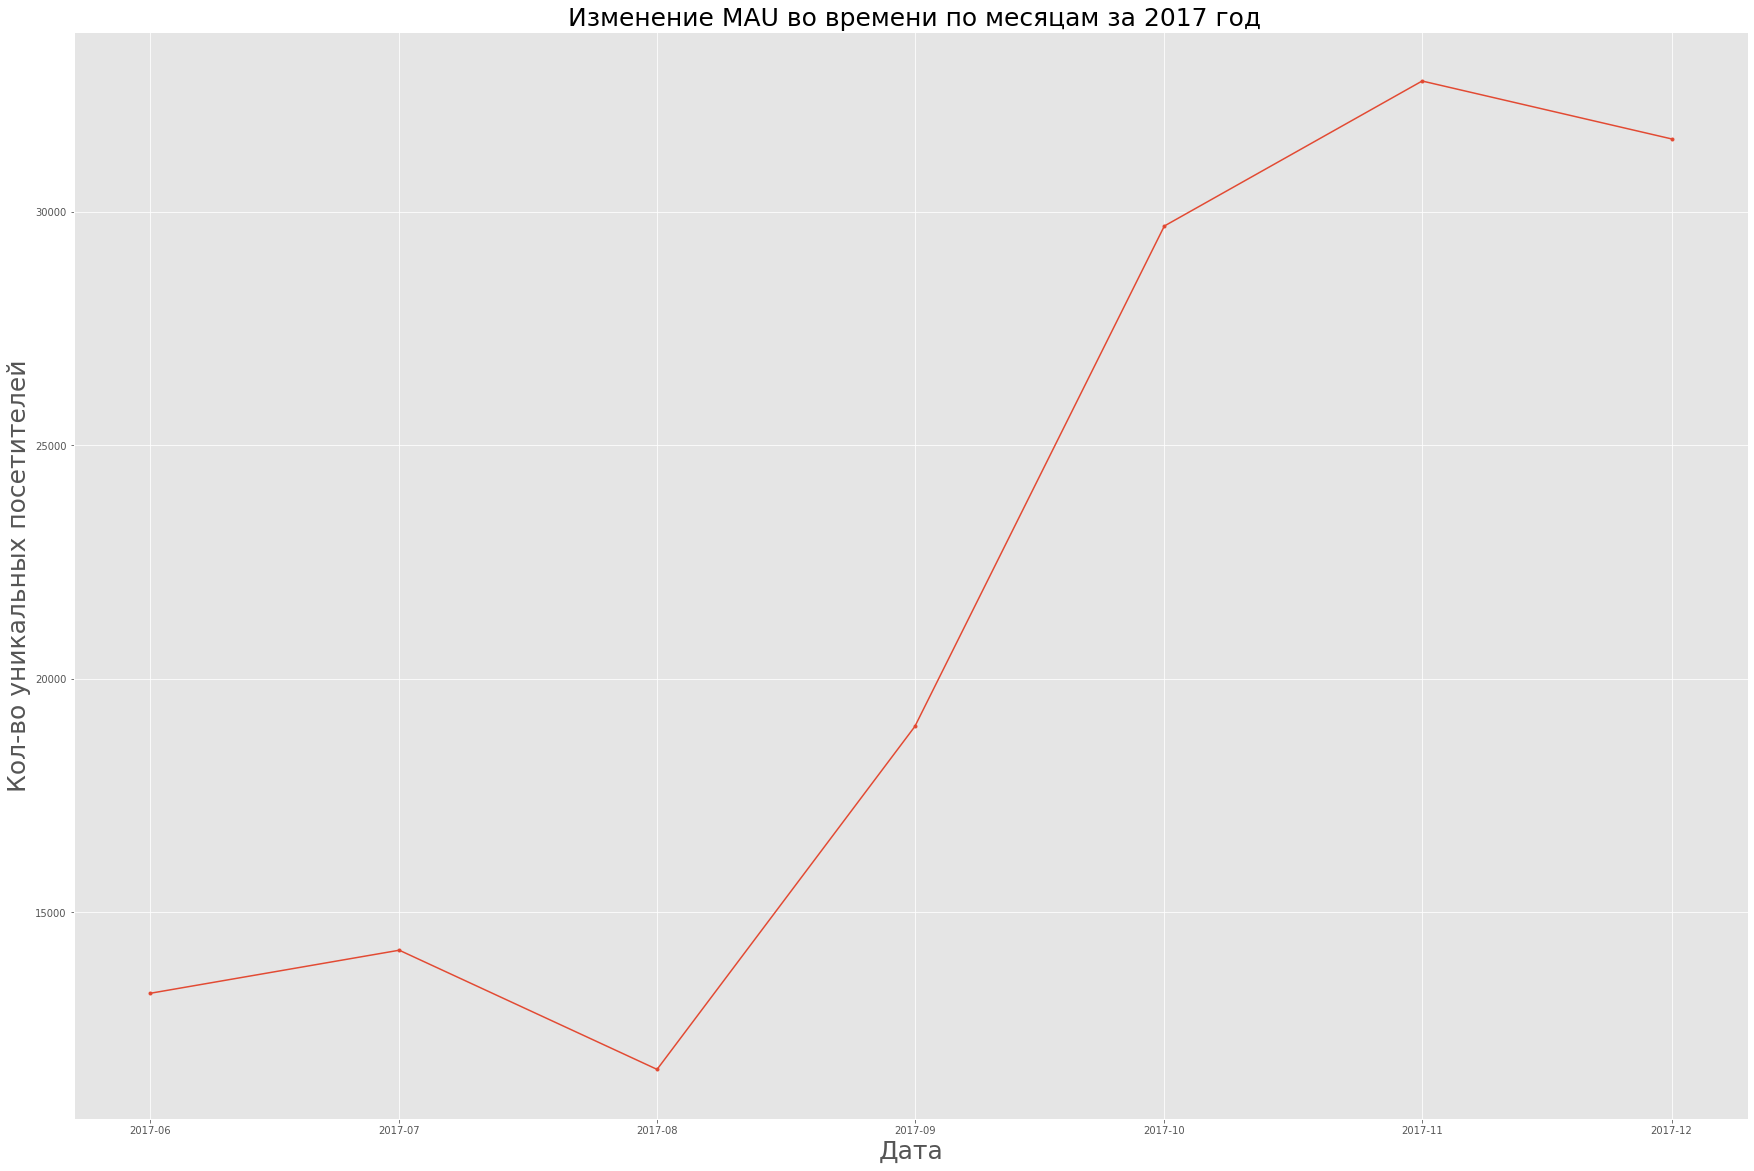

In [13]:

mau_total_2017= visits_2017.groupby('month_session').agg({'uid':'nunique'}).reset_index()
mau_total_2017.columns=['month_session' ,'unique']
print( "Среднее значениие MAU за 2017 =" ,mau_total_2017['unique'].mean())



plt.figure(figsize=(30,20))
plt.style.use('ggplot')
plt.plot(mau_total_2017['month_session'],mau_total_2017['unique'] , marker='.')
plt.title(' Изменение MAU во времени по месяцам за 2017 год' , fontsize=25)
plt.xlabel('Дата',fontsize=25)
plt.ylabel('Кол-во уникальных посетителей',fontsize=25);

Среднее значениие MAU за 2018 = 25329.4


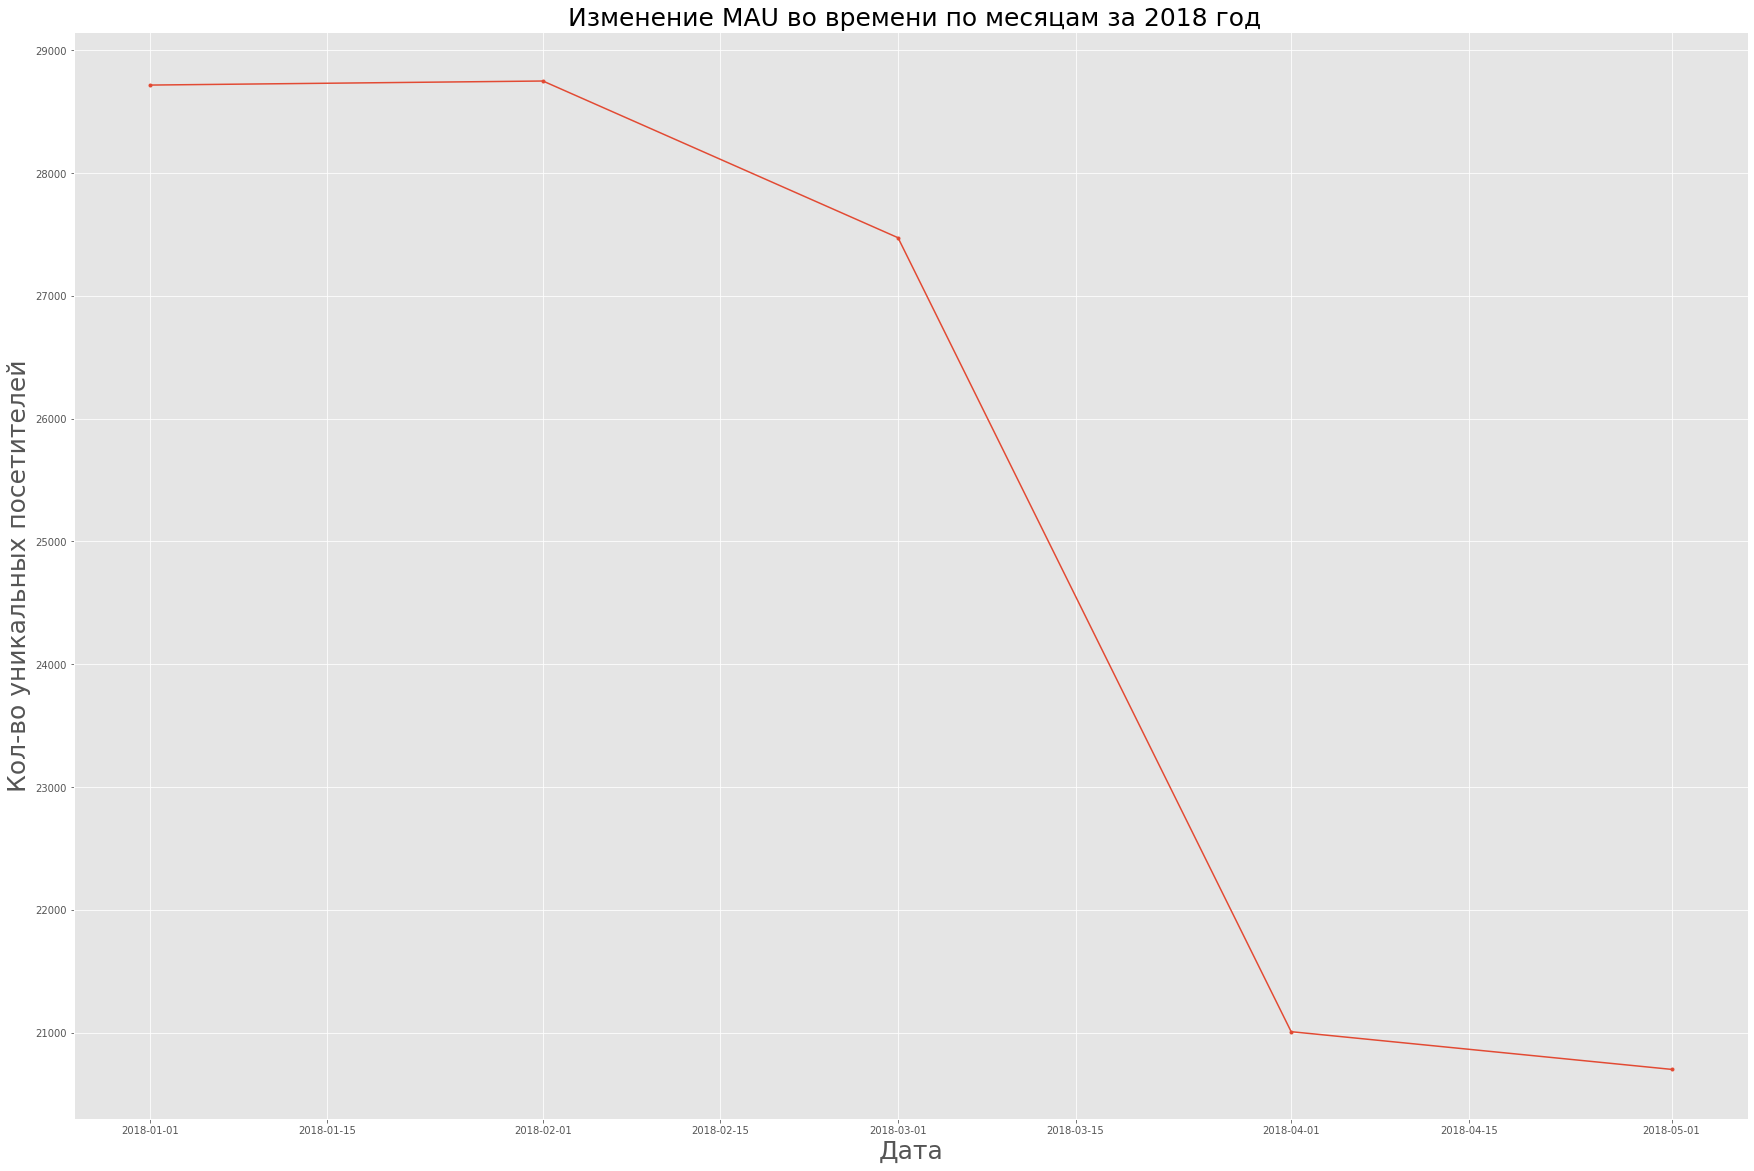

In [14]:
mau_total_2018= visits_2018.groupby('month_session').agg({'uid':'nunique'}).reset_index()
mau_total_2018.columns=['month_session' ,'unique']
print( "Среднее значениие MAU за 2018 =" ,mau_total_2018['unique'].mean())



plt.figure(figsize=(30,20))
plt.style.use('ggplot')
plt.plot(mau_total_2018['month_session'],mau_total_2018['unique'] , marker='.')
plt.title(' Изменение MAU во времени по месяцам за 2018 год' , fontsize=25)
plt.xlabel('Дата',fontsize=25)
plt.ylabel('Кол-во уникальных посетителей',fontsize=25);

#### Исходя из показателей WAU, MAU и DAU видим  ,что был отличный  рост по количеству новых посетителей  в 2017 году и явная тенденция на спад в 2018 году , похоже  чтото пошло не так , и нужно менять стратегию привлечения пользователй 

- 2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени;

Пользователи в среднем заходят на сайт за день  1.0874136559064957


Text(0, 0.5, 'Кол-во среднее количество заходов')

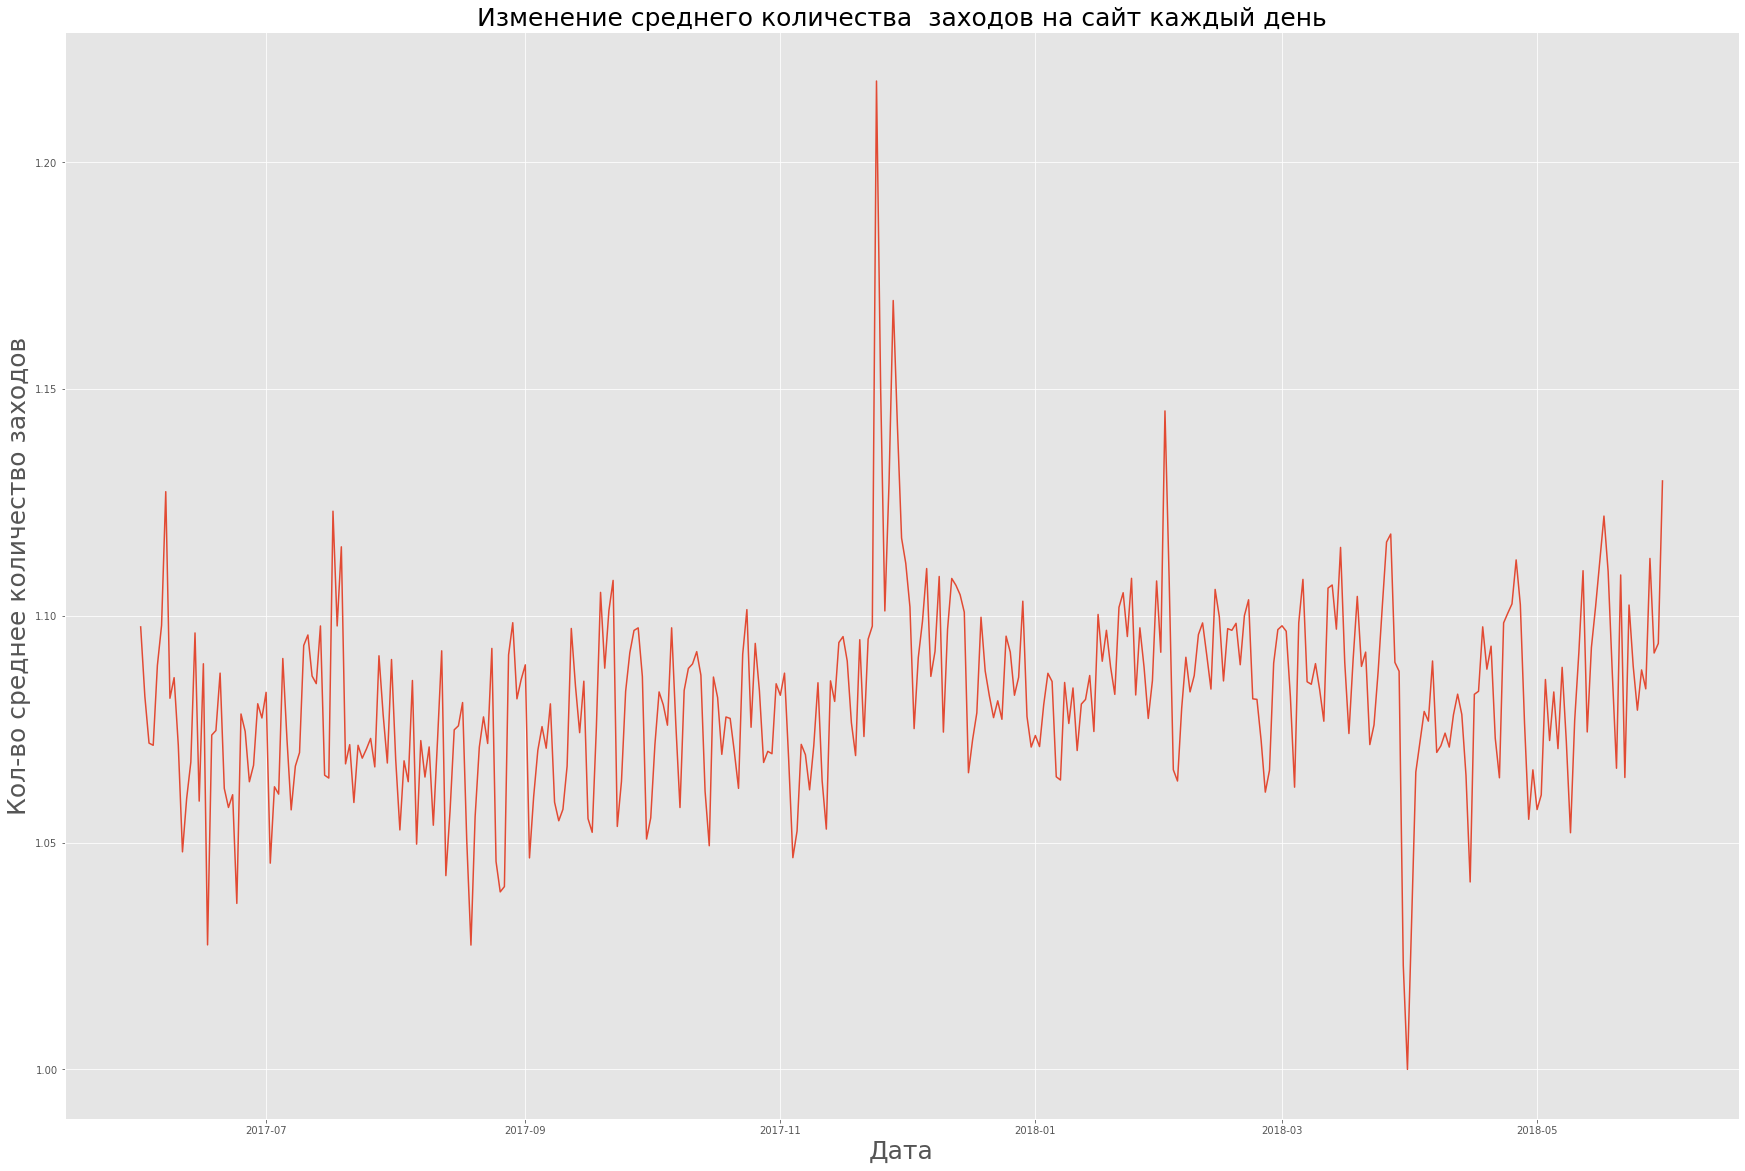

In [15]:
visits_per_day= visits.groupby(['day_session','uid']).agg({'start_ts':'count'}).reset_index()
visits_per_day.columns=['day_session','uid','visits_per_day']
print('Пользователи в среднем заходят на сайт за день ',visits_per_day['visits_per_day'].mean())

visits_per_day_mean=visits_per_day.groupby('day_session').agg({'visits_per_day':'mean'}).reset_index()
visits_per_day_mean.columns=['day_session' ,'visits_per_day_mean']

plt.figure(figsize=(30,20))
plt.style.use('ggplot')
plt.plot(visits_per_day_mean['day_session'],visits_per_day_mean['visits_per_day_mean'])
plt.title(' Изменение среднего количества  заходов на сайт каждый день ' , fontsize=25)
plt.xlabel('Дата',fontsize=25)
plt.ylabel('Кол-во среднее количество заходов',fontsize=25)


#### Видим ,что все колеблится около  среднего значения . Выше проверял пик 2017-11-24  окзалалось ,что в этот день затраты на   самый  эффективный  источник трафика №1 был самый высоким , за все время наблюдений  , думаю ,что середзные колебания связаны , с  количеством бюджета , распределеного  по разному между    источниками  трафика . В дни просадок выбор был сделан на наименее эффективные источники , в дни взлетов показателей , выбор был более удачным .

- 2.1.3. Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно;

In [16]:
visits['start_ts']=pd.to_datetime(visits['start_ts'] , format="%Y-%m-%d %H:%M")
visits['end_ts']=pd.to_datetime(visits['end_ts'] , format="%Y-%m-%d %H:%M")
visits['session_duration_sec']=(visits['end_ts']-visits['start_ts']).dt.seconds
visits.head(10)

,device,end_ts,source_id,start_ts,uid,year_session,month_session,week_session,day_session,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,2018-01-01,2018-01-25,2018-01-30,3360
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,2017-11-01,2017-11-02,2017-11-05,60
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017,2017-07-01,2017-07-13,2017-07-19,180
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017,2017-11-01,2017-11-02,2017-11-08,60


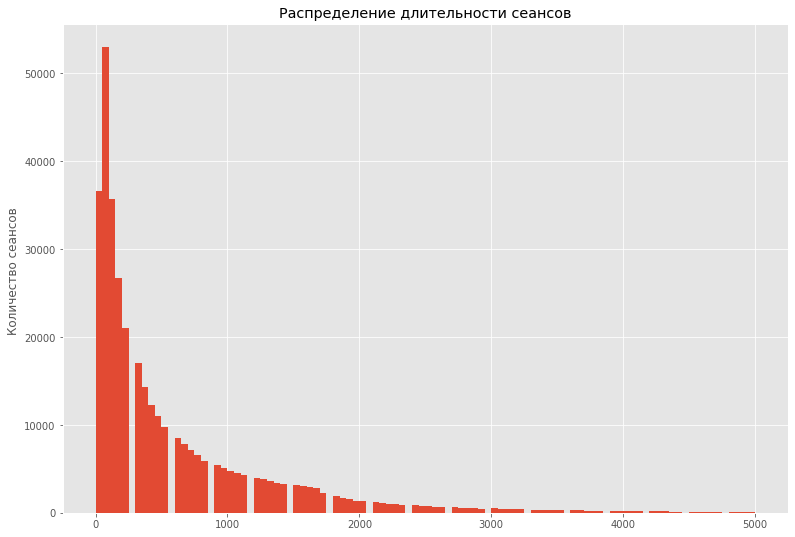

In [17]:

plt.figure(figsize=(13,9))

plt.hist(visits['session_duration_sec'] ,bins=100 , range=(0,5000))
plt.title('Распределение длительности сеансов')
plt.ylabel('Количество сеансов ');

Видим ,что бОльшее количество  сеансов имеют продолжительность  до 2000 секунд или около 33 минут 

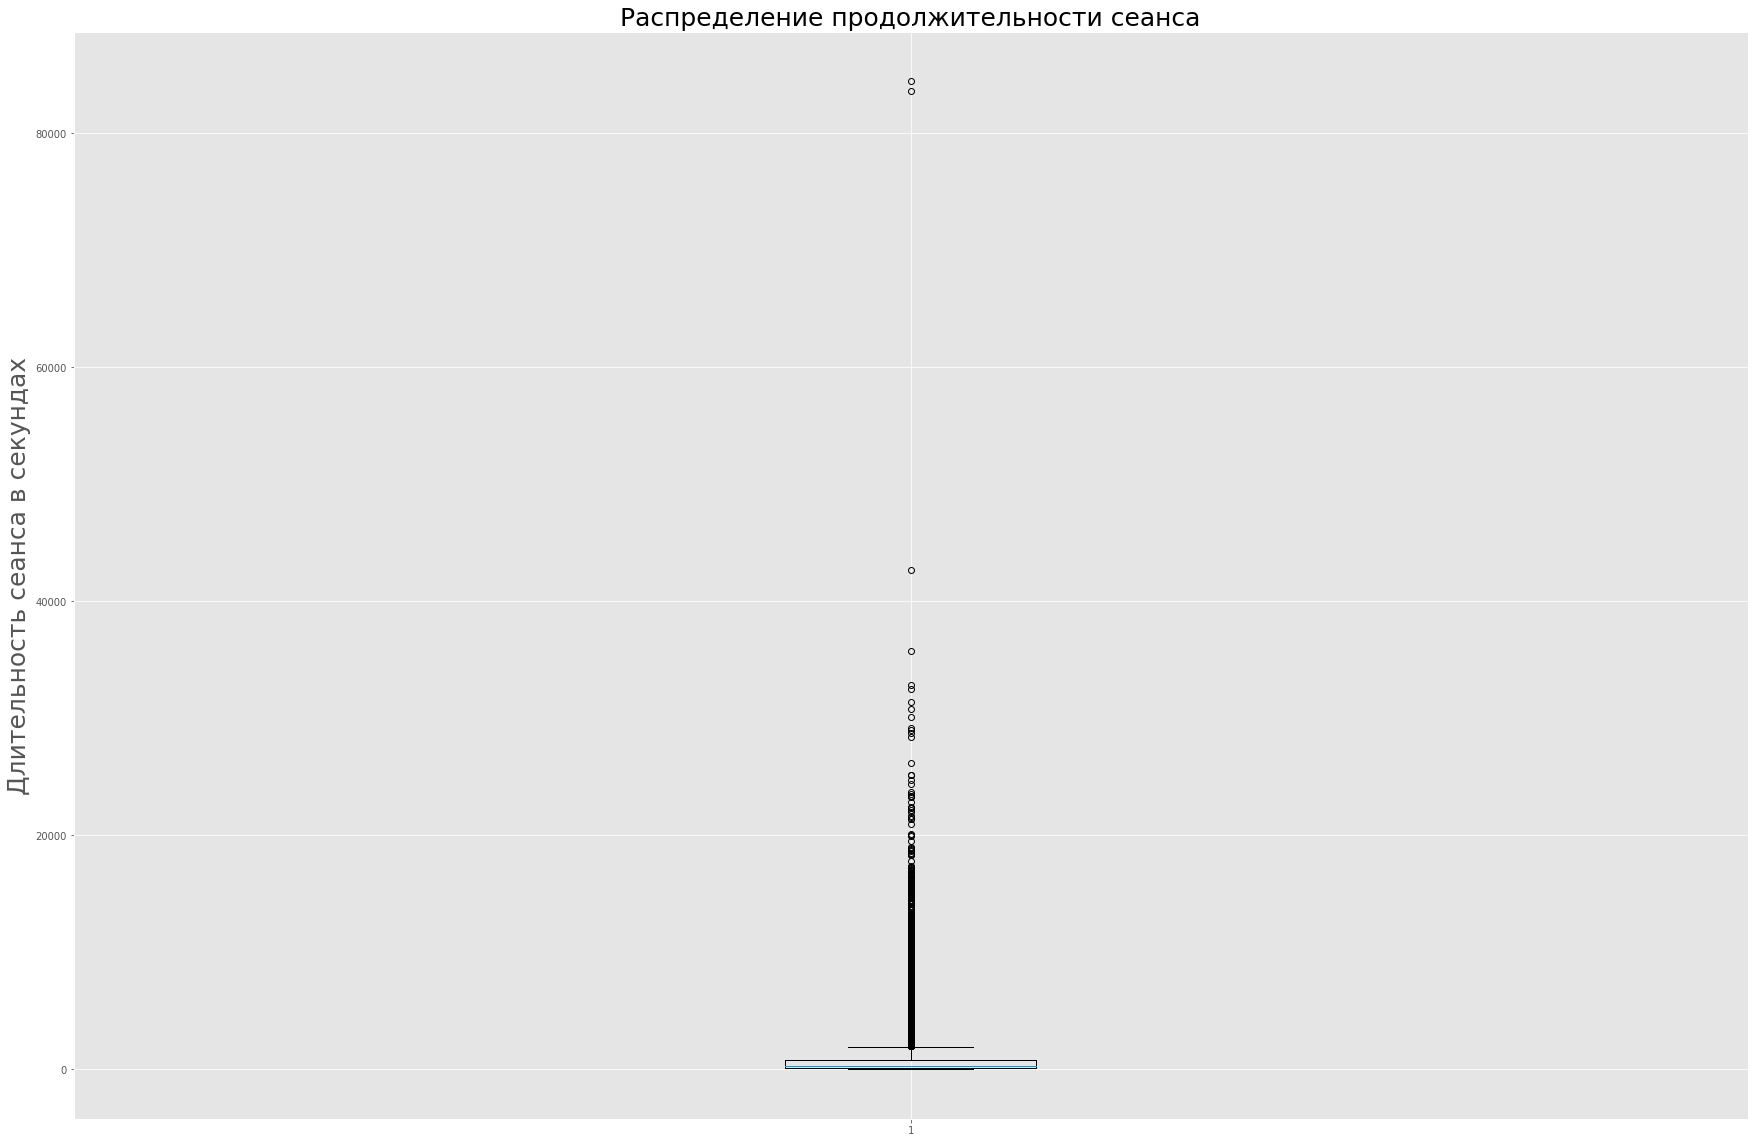

In [18]:
plt.figure(figsize=(30,20))
plt.boxplot(visits['session_duration_sec'] )
plt.title('Распределение продолжительности сеанса' ,fontsize=25)
plt.ylabel('Длительность сеанса в секундах' , fontsize=25)
plt.show()

In [19]:
visits.describe()

,source_id,uid,year_session,session_duration_sec
count,359400.000000,3.594000e+05,359400.000000,359400.000000
mean,3.750515,9.202557e+18,2017.453395,643.506489
std,1.917116,5.298433e+18,0.497824,1016.334786
min,1.000000,1.186350e+13,2017.000000,0.000000
25%,3.000000,4.613407e+18,2017.000000,120.000000
50%,4.000000,9.227413e+18,2017.000000,300.000000
75%,5.000000,1.372824e+19,2018.000000,840.000000
max,10.000000,1.844668e+19,2018.000000,84480.000000


In [20]:
real_session=visits.query('session_duration_sec <= 2000')
display(real_session.describe())
print(real_session['session_duration_sec'].mode()[0])

,source_id,uid,year_session,session_duration_sec
count,336053.000000,3.360530e+05,336053.000000,336053.000000
mean,3.786703,9.199287e+18,2017.453753,451.247726
std,1.904187,5.301514e+18,0.497857,485.463149
min,1.000000,1.186350e+13,2017.000000,0.000000
25%,3.000000,4.608723e+18,2017.000000,60.000000
50%,4.000000,9.221059e+18,2017.000000,240.000000
75%,5.000000,1.373935e+19,2018.000000,660.000000
max,10.000000,1.844668e+19,2018.000000,1980.000000


60


#### Среднее значение по продолжительности сеанса , после того как убрали аномальные значения , равно 451 секунде, , мода равна 60 секундам , очевидно ,что мода показывает значение всех пользвоватей ,сеанс которых продлился меньше минуты .

- 2.1.4. Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.

In [21]:

first_visit_date=(visits.groupby('uid').agg({'start_ts':'min'}).rename(columns={'start_ts':'first_visit'}))
first_visit_date['first_visit_month']=first_visit_date['first_visit'].astype('datetime64[M]')


retention=visits.set_index('uid').join(first_visit_date, how='left')[['month_session','first_visit_month']]
retention['lifetime']=(retention['month_session']-retention['first_visit_month'])/np.timedelta64(1,'M')

visits=visits.merge(retention , on='uid')

visits.head(10)

,device,end_ts,source_id,start_ts,uid,year_session,month_session_x,week_session,day_session,session_duration_sec,month_session_y,first_visit_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01,2017-12-01,0.000000
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01,2018-02-01,0.000000
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-07-01,0.000000
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-05-01,2018-03-01,2.004148
4,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01,2018-03-01,0.000000
5,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-05-01,2018-03-01,2.004148
6,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-01,2018-03-01,0.000000
7,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-01,2017-12-01,0.000000
8,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-09-01,2017-09-01,0.000000
9,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-10-01,2017-09-01,0.985647


In [22]:

visits['lifetime']=visits['lifetime'].round().astype('int')

visits.head(10)

,device,end_ts,source_id,start_ts,uid,year_session,month_session_x,week_session,day_session,session_duration_sec,month_session_y,first_visit_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-05-01,2018-03-01,2
4,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01,2018-03-01,0
5,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-05-01,2018-03-01,2
6,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-01,2018-03-01,0
7,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-01,2017-12-01,0
8,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-09-01,2017-09-01,0
9,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,2017-08-31,2017-09-03,60,2017-10-01,2017-09-01,1


In [23]:
cohorts=visits.groupby(['first_visit_month','lifetime']).agg({'uid':'nunique'}).reset_index()
initial_cohort_users=cohorts[cohorts['lifetime']==0][['first_visit_month','uid']]
initial_cohort_users=initial_cohort_users.rename(columns={'uid':'total_user'})

cohorts=cohorts.merge(initial_cohort_users,on='first_visit_month')
cohorts['first_visit_month']=cohorts['first_visit_month'].dt.strftime('%Y-%m')
cohorts['retention']=cohorts['uid']/cohorts['total_user']
cohorts_retention=cohorts.pivot_table(index='first_visit_month',columns='lifetime',values='retention',aggfunc='sum')




In [24]:
cohorts_retention=cohorts_retention.drop(columns=0)

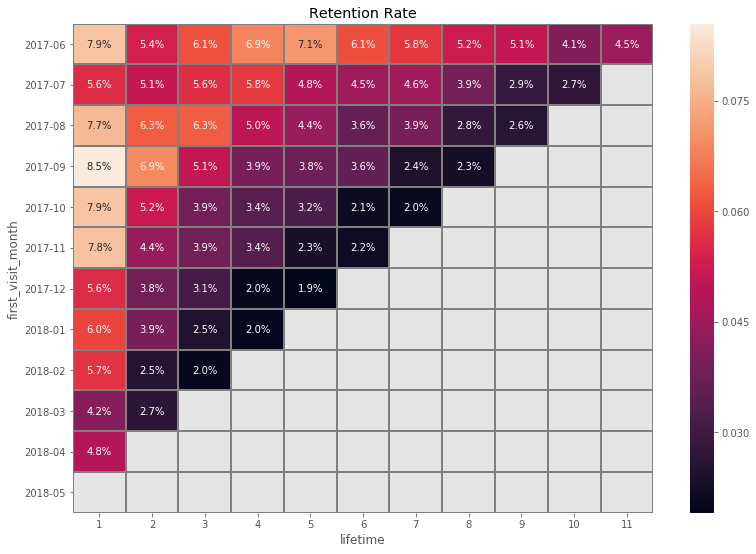

In [25]:
plt.figure(figsize=(13,9))
plt.title('Retention Rate')
sns.heatmap(cohorts_retention, annot=True, fmt='.1%', linewidths=1, linecolor='gray');


In [26]:
cohorts_2=cohorts[cohorts['lifetime']==1]
cohorts_2

,first_visit_month,lifetime,uid,total_user,retention
1,2017-06,1,1043,13259,0.078664
13,2017-07,1,737,13140,0.056088
24,2017-08,1,783,10181,0.076908
34,2017-09,1,1428,16704,0.085489
43,2017-10,1,2042,25977,0.078608
51,2017-11,1,2133,27248,0.078281
58,2017-12,1,1410,25268,0.055802
64,2018-01,1,1351,22624,0.059715
69,2018-02,1,1267,22197,0.057080
73,2018-03,1,861,20589,0.041818


In [27]:
cohorts_2=cohorts[cohorts['lifetime']==1]
ret=cohorts_2['retention'].mean()*100
print('Средний показатель retention rate на второй месяц жизни когорт равен {:.2f} '.format(ret))

Средний показатель retention rate на второй месяц жизни когорт равен 6.52 


- По тепловой карте видим , что Retention Rate  для каждой когорты постепенно падает , средний показатель на 2ой месяц жизни это 6,52 % из когорты возращаются на сайт 

#### 2.2. Метрики электронной коммерции

- 2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;

In [28]:
first_visit=visits.groupby('uid')['start_ts'].min().reset_index()
first_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 2 columns):
uid         228169 non-null uint64
start_ts    228169 non-null datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 3.5 MB


In [29]:
orders.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [30]:
first_order=orders.groupby('uid')['buy_ts'].min().reset_index()

first_order=first_order.merge(first_visit, on='uid')
first_order['time_to_buy']=pd.to_datetime(first_order['buy_ts'])-pd.to_datetime(first_order['start_ts'])
time_to_buy_median=first_order['time_to_buy'].mode()[0]

print('Среднее количество времени с момента первого захода на сайт до первой покупки составляет ',time_to_buy_median)


Среднее количество времени с момента первого захода на сайт до первой покупки составляет  0 days 00:01:00


- 2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

In [31]:

orders['order_month']=orders['buy_ts'].astype('datetime64[M]')
orders_month=orders.groupby('order_month')['buy_ts'].count().reset_index()

total_users=orders.groupby(['order_month'])['uid'].nunique().reset_index()


total_users=total_users.merge(orders_month,on='order_month')
total_users['orders_per_client']=total_users['buy_ts']/total_users['uid']
total_users=total_users.query('order_month< "2017-12-01"')
order_mean=total_users['orders_per_client'].mean()
print('Среднее количество покупок за 6 месяцев на 1 покупателя равно {:.3} раза  в месяц'.format(order_mean))

Среднее количество покупок за 6 месяцев на 1 покупателя равно 1.21 раза  в месяц


- 2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;

In [32]:

#revenue_per_m=orders.groupby('order_month')['revenue'].sum().reset_index()
#total_customers=orders.groupby('order_month')['uid'].nunique().reset_index()
#total_customers=total_customers.merge(revenue_per_m, on='order_month')
#total_customers['ave_revenue']=total_customers['revenue']/total_customers['uid']

revenue_per_month=orders.groupby(['uid','buy_ts'])['revenue'].sum().reset_index()
mean_revenue=revenue_per_month['revenue'].mean()
mean_revenue

4.9996467

In [33]:
print('Средний чек посчитаный за период в 12 полных  месяцев равен {:.2} долларов'.format(mean_revenue))

Средний чек посчитаный за период в 12 полных  месяцев равен 5.0 долларов


In [34]:
revenue_per_m=orders.groupby('order_month')['revenue'].sum().reset_index()
total_customers=orders.groupby('order_month')['uid'].nunique().reset_index()
total_customers=total_customers.merge(revenue_per_m, on='order_month')
total_customers['ave_revenue']=total_customers['revenue']/total_customers['uid']

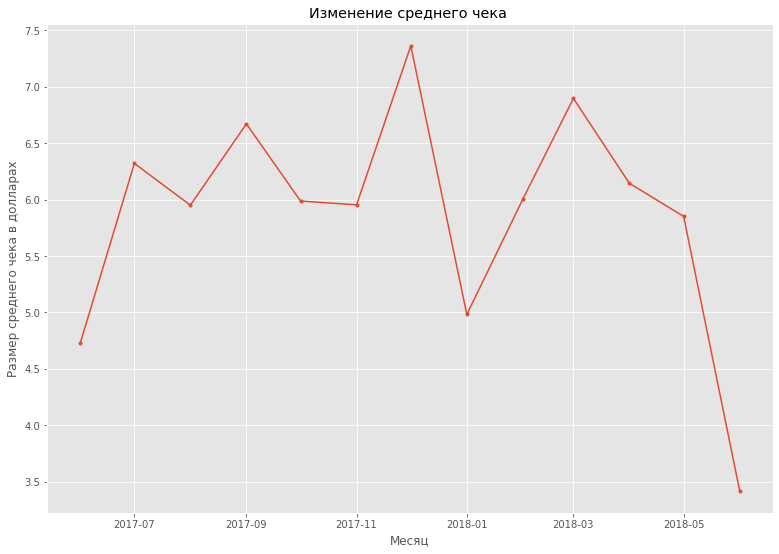

In [35]:
plt.figure(figsize=(13,9))
plt.title('Изменение среднего чека ')
plt.plot(total_customers['order_month'],total_customers['ave_revenue'], marker='.')
plt.xlabel('Месяц')
plt.ylabel('Размер среднего чека в долларах')
plt.show()

- Видим что самый высокий средний чек был в декабре 2017 года 

- 2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

In [36]:
orders.head(10)
first_order_month=orders.groupby('uid')['order_month'].min().reset_index()
first_order_month.columns=['uid','first_order_month']


In [37]:
cohorts_size=first_order_month.groupby('first_order_month')['uid'].nunique().reset_index()
cohorts_size.columns =['first_order_month','total_buyers']

In [38]:
orders_new = pd.merge(orders,first_order_month,on='uid')
cohorts=orders_new.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
cohorts

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.490234
1,2017-06-01,2017-07-01,981.820007
2,2017-06-01,2017-08-01,885.340027
3,2017-06-01,2017-09-01,1931.300049
4,2017-06-01,2017-10-01,2068.580078
...,...,...,...
74,2018-03-01,2018-05-01,1114.869995
75,2018-04-01,2018-04-01,10600.690430
76,2018-04-01,2018-05-01,1209.920044
77,2018-05-01,2018-05-01,13925.759766


In [39]:
report=pd.merge(cohorts,cohorts_size, on='first_order_month')
report

,first_order_month,order_month,revenue,total_buyers
0,2017-06-01,2017-06-01,9557.490234,2023
1,2017-06-01,2017-07-01,981.820007,2023
2,2017-06-01,2017-08-01,885.340027,2023
3,2017-06-01,2017-09-01,1931.300049,2023
4,2017-06-01,2017-10-01,2068.580078,2023
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.869995,3533
75,2018-04-01,2018-04-01,10600.690430,2276
76,2018-04-01,2018-05-01,1209.920044,2276
77,2018-05-01,2018-05-01,13925.759766,2988


In [40]:
margin_rate = 1
report['gp']=report['revenue']*1
report['age']=(report['order_month']-report['first_order_month'])/np.timedelta64(1,'M')
report['age']=report['age'].round().astype('int')
report['ltv']=report['gp']/report['total_buyers']
report['first_order_month']=report['first_order_month'].dt.strftime('%Y-%m')
report.head(10)

,first_order_month,order_month,revenue,total_buyers,gp,age,ltv
0,2017-06,2017-06-01,9557.490234,2023,9557.490234,0,4.724414
1,2017-06,2017-07-01,981.820007,2023,981.820007,1,0.485329
2,2017-06,2017-08-01,885.340027,2023,885.340027,2,0.437637
3,2017-06,2017-09-01,1931.300049,2023,1931.300049,3,0.954671
4,2017-06,2017-10-01,2068.580078,2023,2068.580078,4,1.022531
5,2017-06,2017-11-01,1487.920044,2023,1487.920044,5,0.735502
6,2017-06,2017-12-01,1922.739990,2023,1922.739990,6,0.950440
7,2017-06,2018-01-01,1176.560059,2023,1176.560059,7,0.581592
8,2017-06,2018-02-01,1119.150024,2023,1119.150024,8,0.553213
9,2017-06,2018-03-01,1225.510010,2023,1225.510010,9,0.605788


In [41]:
report_pivot=report.pivot_table(index='first_order_month',columns='age',values='ltv', aggfunc='mean')
report_pivot=report_pivot.cumsum(axis=1).fillna(0).round(2)
#report_pivot=report_pivot.loc['2017-06-01':'2017-12-01']

report_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,0.00
2017-08,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,0.00,0.00
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,0.00,0.00,0.00
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,0.00,0.00,0.00,0.00
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.40,0.00,0.00,0.00,0.00,0.00
2017-12,4.74,5.00,5.92,6.99,7.30,7.64,0.00,0.00,0.00,0.00,0.00,0.00
2018-01,4.14,4.43,4.73,4.88,4.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02,4.16,4.44,4.51,4.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


-Лучшие показатели у Июньской и Сентябрьской когорт

In [42]:
ltv=report_pivot.loc['2017-06'].sum()
print('За год в среднем один покупатель приносит {} USD'.format(ltv))

За год в среднем один покупатель приносит 102.36 USD


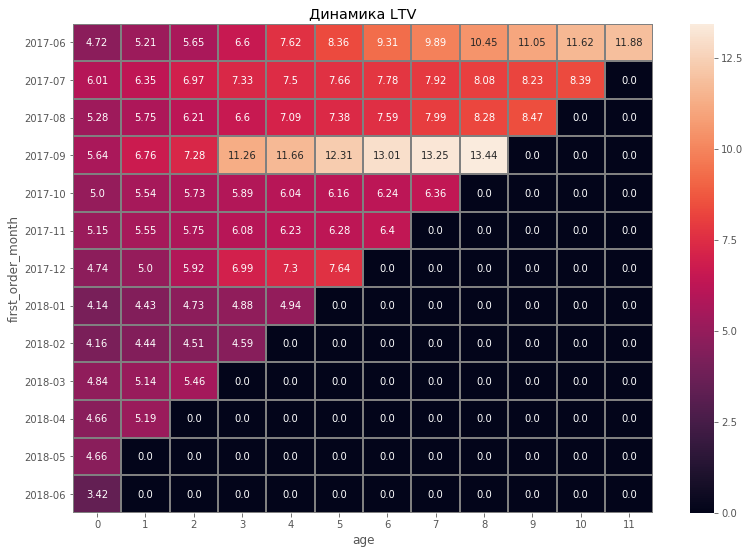

In [43]:
#report_pivot=report_pivot.drop(columns=0)
plt.figure(figsize=(13,9))
plt.title('Динамика LTV')
sns.heatmap(report_pivot, annot=True, fmt='.4', linewidths=1, linecolor='gray');

In [44]:
mean_ltv=report.groupby('first_order_month')['ltv'].sum().head(6).reset_index()
print('Средний ltv за 6 месяцев ' ,mean_ltv['ltv'].mean())

Средний ltv за 6 месяцев  9.154753885941803


Видим ,что пользователи сделавшие свои первые покупки в сентябре , гораздо ,чаще других пользователей возравращаются обратно на сайт за очередной покупкой

#### 2.3. Маркетинговые метрики

Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

- 2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени;

In [45]:

costs_per_sorce=costs.groupby('source_id')['costs'].sum().reset_index()
costs_sum=costs_per_sorce['costs'].sum().round()    
print('Сумарные расходы  по всем источникам равны ', costs_sum)

Сумарные расходы  по всем источникам равны  329132.0


In [46]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


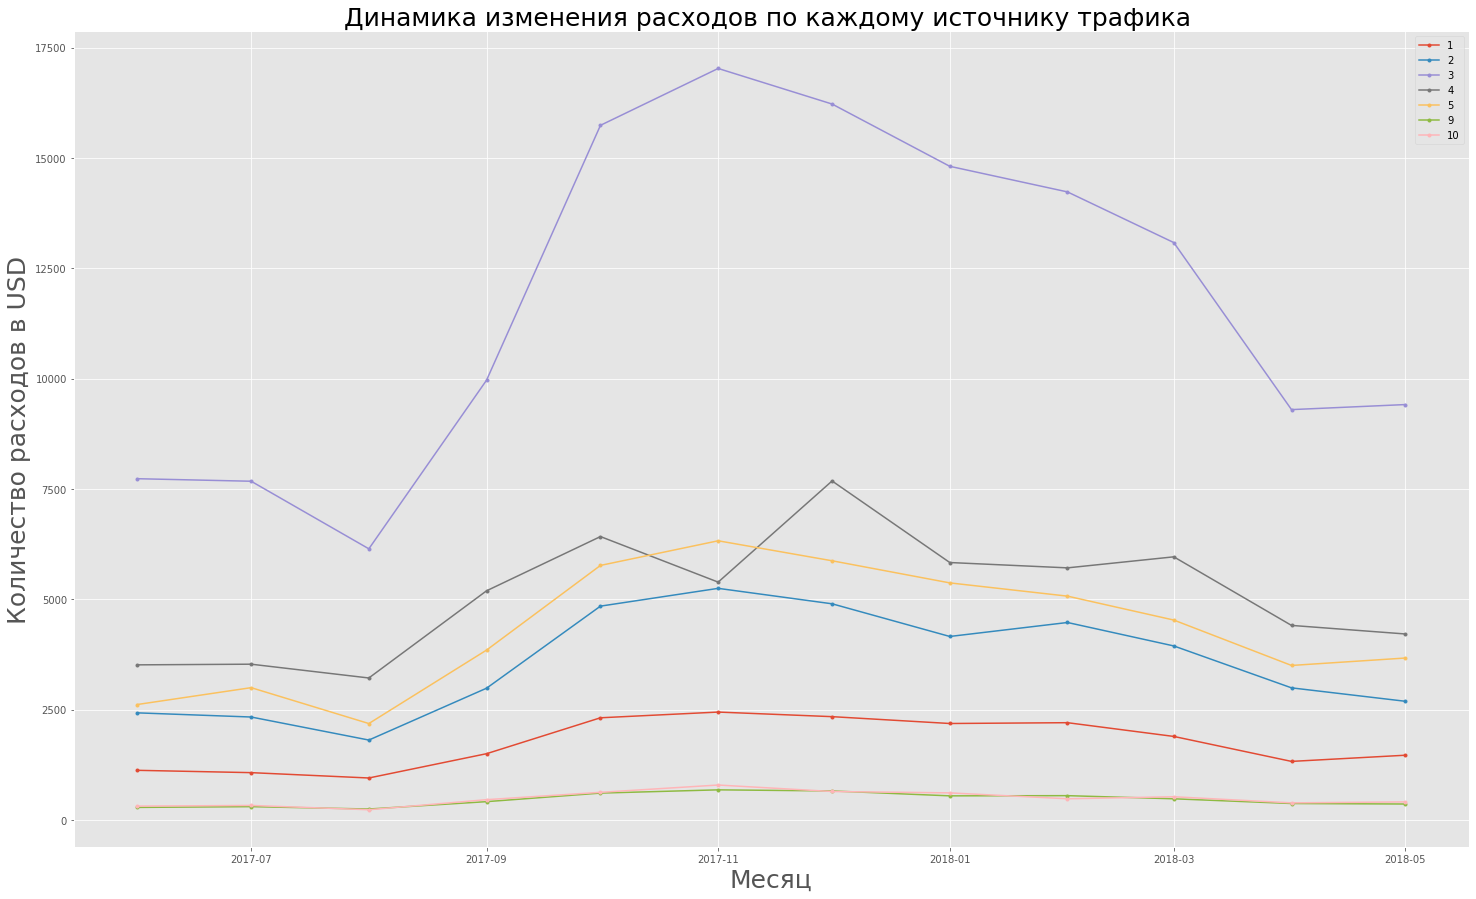

In [47]:
costs['month']=costs['dt'].astype('datetime64[M]')
costs_per_month=costs.groupby(['source_id','month'])['costs'].sum().reset_index()
source_list=costs['source_id'].unique().tolist()

plt.figure(figsize=(25,15))
plt.title('Динамика изменения расходов по каждому источнику трафика ' , fontsize=25)
for x in source_list:
    data=costs_per_month.query('source_id==@x').sort_values(by='month', ascending=False)
    plt.plot(data.month , data.costs, label=x , marker='.')
    plt.legend()
    
plt.ylabel('Количество расходов в USD' , fontsize=25) 
plt.xlabel('Месяц',fontsize=25)
plt.show()

С большим отрывам по количеству затрат лидирует источник №3 , одни из самых не эффективных источников трафика . Лучший же по показателям ROMI  №1 в конце списка по количеству затрат . Маркетингу срочно нужно менять приоритеты .

In [48]:
costs_per_sorce

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


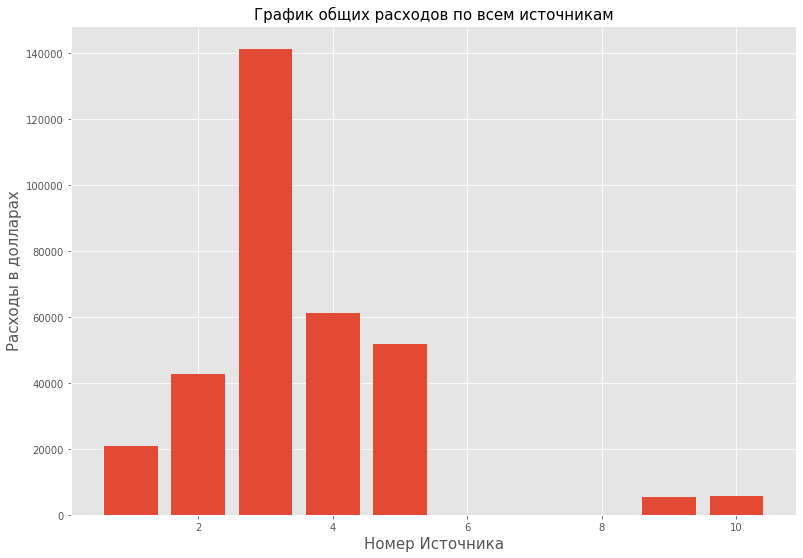

In [49]:
plt.figure(figsize=(13,9))
plt.bar(costs_per_sorce['source_id'],costs_per_sorce['costs'])
plt.title('График общих расходов по всем источникам' , fontsize=15)
plt.ylabel('Расходы в долларах',fontsize=15)
plt.xlabel('Номер Источника',fontsize=15)
plt.show()

Видим ,что в по общему числу трат  лидирует источник трафика №3 , на источники № 1,9,10   расходуют меньше всего средств

- 2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках;

In [50]:
costs_per_month.columns=['source_id','order_month','costs']

In [51]:


total_users_per_month=orders.groupby('order_month')['uid'].nunique().reset_index()
total_users_per_month

,order_month,uid
0,2017-06-01,2023
1,2017-07-01,1984
2,2017-08-01,1472
3,2017-09-01,2750
4,2017-10-01,4675
5,2017-11-01,4547
6,2017-12-01,4942
7,2018-01-01,3898
8,2018-02-01,4258
9,2018-03-01,4181


In [52]:
visits['session_month']=visits['start_ts'].astype('datetime64[M]')
total_users_per_source=visits.sort_values(by=['source_id','session_month','uid'])

total_users_per_source=total_users_per_source[['source_id','session_month','uid']]
total_users_per_source.columns=['source_id','order_month','uid']
total_users_per_source

,source_id,order_month,uid
4968605,1,2017-06-01,28094489227360733
4968606,1,2017-06-01,28094489227360733
4968607,1,2017-06-01,28094489227360733
4968608,1,2017-06-01,28094489227360733
4968609,1,2017-06-01,28094489227360733
...,...,...,...
4936148,10,2018-05-01,18339948325641865812
4936149,10,2018-05-01,18339948325641865812
4936150,10,2018-05-01,18339948325641865812
4936151,10,2018-05-01,18339948325641865812


In [53]:
users=total_users_per_source.merge(orders, on=['order_month','uid'])

users=users.groupby(['source_id','order_month','uid'])['buy_ts'].min().reset_index()
unique_buyers_per_source=users.groupby(['source_id','order_month'])['uid'].nunique().reset_index()
unique_buyers_per_source=unique_buyers_per_source.merge(costs_per_month, on=['source_id','order_month'])
unique_buyers_per_source['cac']=unique_buyers_per_source['costs']/unique_buyers_per_source['uid']
unique_buyers_per_source

,source_id,order_month,uid,costs,cac
0,1,2017-06-01,326,1125.61,3.452791
1,1,2017-07-01,338,1072.88,3.174201
2,1,2017-08-01,233,951.81,4.085021
3,1,2017-09-01,457,1502.01,3.286674
4,1,2017-10-01,724,2315.75,3.198550
...,...,...,...,...,...
79,10,2018-01-01,107,614.35,5.741589
80,10,2018-02-01,160,480.88,3.005500
81,10,2018-03-01,211,526.41,2.494834
82,10,2018-04-01,134,388.25,2.897388


In [54]:
mean_cac=unique_buyers_per_source['cac'].mean()
print('Средний CAC равен {:.2} доллара' .format(mean_cac) )

Средний CAC равен 5.9 доллара


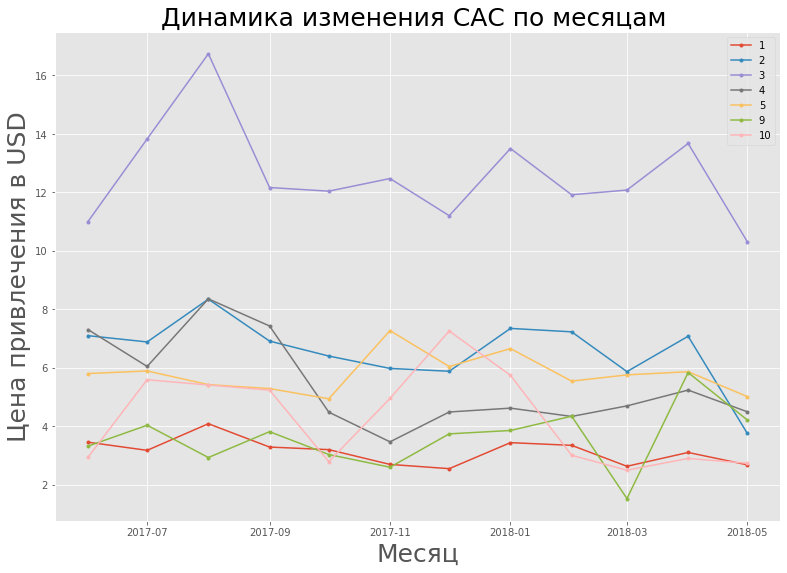

In [55]:
source_list=unique_buyers_per_source['source_id'].unique().tolist()

plt.figure(figsize=(13,9))
for p in source_list:
    data=unique_buyers_per_source.query('source_id==@p').sort_values(by='order_month' , ascending=False)
    plt.plot(data.order_month, data.cac , label=p,marker='.')
    plt.legend()
plt.title('Динамика изменения CAC по месяцам ' ,fontsize=25)   
plt.ylabel('Цена привлечения в USD' ,fontsize=25)
plt.xlabel('Месяц' ,fontsize=25)
plt.show()

Не удивительно , что по  показателю CAC   источник №3 обгоняет всех. Очевидная неэффективность данного инструмента . И о себе кричит красная линия показателя CAC для источника №1. Делаем выводы

- 2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

In [56]:
users

,source_id,order_month,uid,buy_ts
0,1,2017-06-01,63862661827066303,2017-06-19 15:12:00
1,1,2017-06-01,143427074811278640,2017-06-20 16:05:00
2,1,2017-06-01,148401564840028266,2017-06-05 19:20:00
3,1,2017-06-01,201308712819916034,2017-06-14 16:13:00
4,1,2017-06-01,307206944887803466,2017-06-20 23:39:00
...,...,...,...,...
49899,10,2018-05-01,17699107162086747019,2018-05-17 10:34:00
49900,10,2018-05-01,17770200575469335939,2018-05-31 10:31:00
49901,10,2018-05-01,17958135522853021129,2018-05-28 19:19:00
49902,10,2018-05-01,17984673488503672887,2018-05-17 11:44:00


In [57]:
orders.head(10)
revenue_user=orders.groupby(['order_month','uid'])['revenue'].sum().reset_index()
revenue_user=revenue_user.merge(users, on=['order_month','uid'])
revenue_source=revenue_user.groupby(['source_id','order_month'])['revenue'].sum().reset_index()
revenue_source

,source_id,order_month,revenue
0,1,2017-06-01,2127.530029
1,1,2017-07-01,3271.270020
2,1,2017-08-01,2620.070068
3,1,2017-09-01,6258.660156
4,1,2017-10-01,8717.009766
...,...,...,...
80,10,2018-01-01,322.690002
81,10,2018-02-01,456.309998
82,10,2018-03-01,786.760010
83,10,2018-04-01,368.520020


In [58]:
report_table=pd.merge(unique_buyers_per_source,revenue_source,on=['source_id','order_month'])
report_table=report_table.rename(columns={'uid':'unique_buyers'})
margine_rate=1
report_table['gp']=report_table['revenue']*margine_rate
report_table['ltv']=report_table['gp']/report_table['unique_buyers']
report_table['romi']=report_table['ltv']/report_table['cac']
report_table

,source_id,order_month,unique_buyers,costs,cac,revenue,gp,ltv,romi
0,1,2017-06-01,326,1125.61,3.452791,2127.530029,2127.530029,6.526166,1.890113
1,1,2017-07-01,338,1072.88,3.174201,3271.270020,3271.270020,9.678314,3.049055
2,1,2017-08-01,233,951.81,4.085021,2620.070068,2620.070068,11.244936,2.752724
3,1,2017-09-01,457,1502.01,3.286674,6258.660156,6258.660156,13.695099,4.166857
4,1,2017-10-01,724,2315.75,3.198550,8717.009766,8717.009766,12.040069,3.764227
...,...,...,...,...,...,...,...,...,...
79,10,2018-01-01,107,614.35,5.741589,322.690002,322.690002,3.015794,0.525254
80,10,2018-02-01,160,480.88,3.005500,456.309998,456.309998,2.851937,0.948906
81,10,2018-03-01,211,526.41,2.494834,786.760010,786.760010,3.728720,1.494576
82,10,2018-04-01,134,388.25,2.897388,368.520020,368.520020,2.750149,0.949182


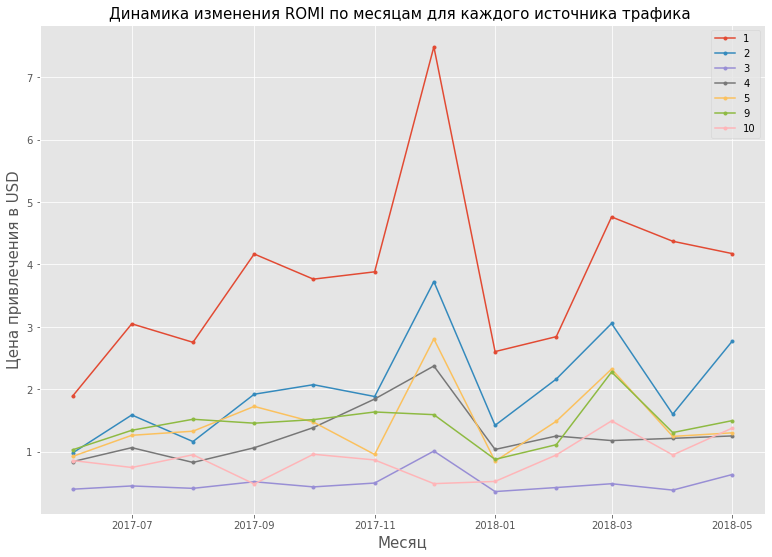

In [59]:


plt.figure(figsize=(13,9))
for p in source_list:
    data=report_table.query('source_id==@p').sort_values(by='order_month' , ascending=False)
    plt.plot(data.order_month, data.romi , label=p,marker='.')
    plt.legend()
plt.title('Динамика изменения ROMI по месяцам для каждого источника трафика ' ,fontsize=15)   
plt.ylabel('Цена привлечения в USD' ,fontsize=15)
plt.xlabel('Месяц' ,fontsize=15)
plt.show()

Первая рекомендация маркетинговому отделу , это перераспределить бюджет между №3 и №1 , акцент делаем на источник трафика №1

In [60]:
report_table['roi']=(report_table['gp']-report_table['costs'])/report_table['costs']
report_table.head(10)

,source_id,order_month,unique_buyers,costs,cac,revenue,gp,ltv,romi,roi
0,1,2017-06-01,326,1125.61,3.452791,2127.530029,2127.530029,6.526166,1.890113,0.890113
1,1,2017-07-01,338,1072.88,3.174201,3271.270020,3271.270020,9.678314,3.049055,2.049055
2,1,2017-08-01,233,951.81,4.085021,2620.070068,2620.070068,11.244936,2.752724,1.752724
3,1,2017-09-01,457,1502.01,3.286674,6258.660156,6258.660156,13.695099,4.166857,3.166857
4,1,2017-10-01,724,2315.75,3.198550,8717.009766,8717.009766,12.040069,3.764227,2.764227
5,1,2017-11-01,908,2445.16,2.692907,9490.450195,9490.450195,10.452038,3.881321,2.881321
6,1,2017-12-01,919,2341.20,2.547552,17522.220703,17522.220703,19.066617,7.484290,6.484290
7,1,2018-01-01,636,2186.18,3.437390,5693.450195,5693.450195,8.951966,2.604292,1.604292
8,1,2018-02-01,659,2204.48,3.345190,6268.290039,6268.290039,9.511821,2.843432,1.843432
9,1,2018-03-01,720,1893.09,2.629292,9012.129883,9012.129883,12.516847,4.760540,3.760540


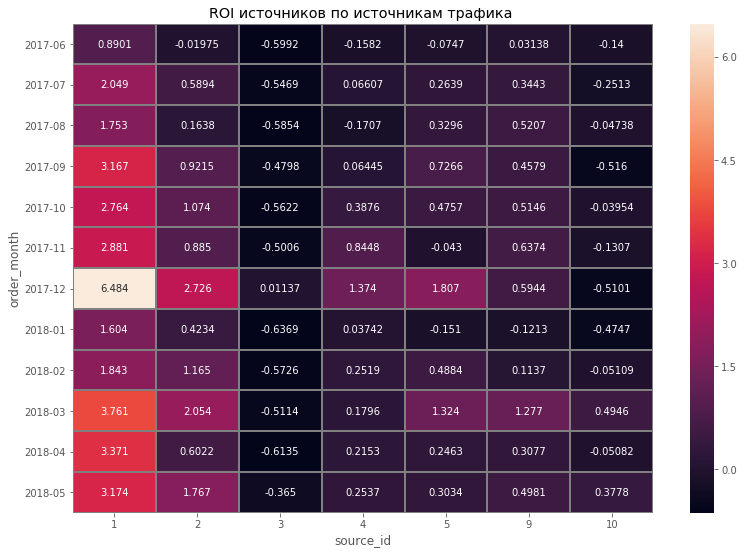

In [61]:
report_table['order_month']=report_table['order_month'].dt.strftime('%Y-%m')
roi=report_table.pivot_table(index='order_month' , columns='source_id', values='roi' , aggfunc='sum')
plt.figure(figsize=(13,9))
sns.heatmap(roi,annot=True, fmt='.4', linewidths=1, linecolor='gray' )
plt.title('ROI источников по источникам трафика ');

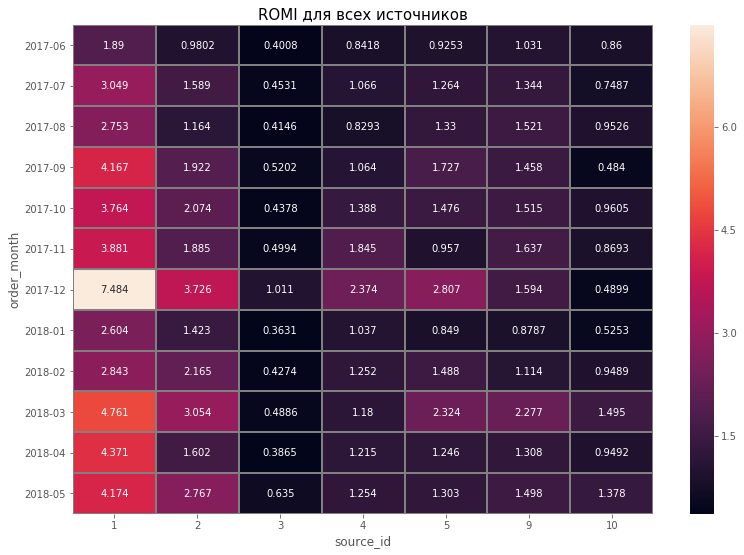

In [62]:
romi=report_table.pivot_table(index='order_month' , columns='source_id' , values='romi' , aggfunc='sum')
plt.figure(figsize=(13,9))
sns.heatmap(romi , annot=True , fmt='.4' , linewidth=1 ,linecolor='gray')
plt.title('ROMI для всех источников' ,fontsize=15);

При рассмотрении темпловых карт становится очевидно , что источник №1 по метрикам ROI и ROMI показывает себя гораздо лучше остальных резурсов , обратим на это внимание маркетологов

<a id='3'></a><br>
## Шаг 3. Сформулируйте выводы и рекомендации

- 3.1. Определите источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему;

Считаю ,что упор нужно делать на источники трафика №1  . У этого источника трафика  показатели ROMI  и ROI самые  высокие  , в то же время расходы , которые тратят на маркетинг для этого источника , одни из самых низких . В данный момент маркетологи ошибочно тратят большое количество стредст на менее эффективный источник трафика №3 . Источник трафика № 9 также по показателю CAC один из самых эффективных , но сюдя по показателю ROMI он окупается гораздо медленнее и хуже  ,чем ,к примреру ,источник №1. Поэтому делаем вывод , главное в маркетинге это не количество привлеченных пользвоателей , а качество , в нашем случае ,"качественными клиентам" можем назватить  покупаелей ,которые сделали покупку  и окупили стоимость затрат на привлечение, поэтому самый "качественный" источник трафика это №1 

- 3.2. Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;

1. Исходя из метри DAU , MAU ,WAU  видим ,что был отличный рост по количеству новых посетителей  в 2017 году и явная тенденция на спад в 2018 году , похоже  чтото пошло не так  и нужно менять стратегию расходов на маркетинг
2. Судя по графику , пользователи ,которые побывали на сайте  в среднем заходят на сайт 1.08 раза за день, по графику видно ,что это показатель держится около этого значения и не растет , так же как и не падает . То есть видим ,что пользователи , посетив , сайт первый раз  , после в среденем 1 раз в день посещают сайт . Для сайта с тематикой как у ЯндексАфиша , такой показатель ,как мне кажется , является очень хорошим.

3. Среднее значение по продолжительности сеанса , после того как убрали аномальные значения , равно чуть более чем 7 минутам , , мода равна 60 секундам , очевидно ,что мода показывает значение всех пользвоватей ,сеанс которых продлился меньше минуты 4.Средний чек посчитаный за период в 12 полных  месяцев равен 5.0 долларов. Самый высокий средний чек набюдался в декабре и марте , думаю тут дела в празниках , выпадающих на этот период , количество мест для посещения становится больше , у людей появляется больше свободного времени .
6.Средний ltv за 6 месяцев  9.154753885941803 , Сумарные расходы  по всем источникам равны  329132.0 ,За год в среднем один покупатель приносит 102.36 USD , от первого захода до покупки 1 минута

- 3.3. Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов;

Судя по графику накопительного LTV , самыми перспективными оказались клиенты сделавшие свои первые покупки в Сентябре  и Июне 2017 года . Видим ,что у этих 2х когорт лучший показатель принесенной прибыли.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, основные результаты проекта описаны. Но возможно после доработок проекта нужно будет внести исправления в общий вывод.
</div>